# GRIP : The Sparks Foundations

# Data Science and Business Analytics Intern

# Author: Anjali Singh

## Task 8 : Timeline Analysis : Covid-19

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install folium
import folium
import pylab as pl
import seaborn as sns
%matplotlib inline

In [18]:
covid_data = pd.read_csv('D:\Downloads/owid-covid-latest.csv');
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,18-05-2021,63819.0,221.0,202.286,2751.0,6.0,5.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1,OWID_AFR,NaN,Africa,18-05-2021,4706525.0,10533.0,8344.143,126889.0,317.0,261.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,18-05-2021,132071.0,39.0,38.286,2436.0,1.0,2.286,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
3,DZA,Africa,Algeria,18-05-2021,125693.0,208.0,172.857,3388.0,7.0,6.429,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
4,AND,Europe,Andorra,18-05-2021,13569.0,14.0,17.429,127.0,0.0,0.000,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868


In [5]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.665400e+04,86652.000000,85651.000000,7.685600e+04,77014.000000,85651.000000,86187.000000,86185.000000,85189.000000,76402.000000,...,80833.000000,54728.000000,81049.000000,82860.000000,63479.000000,62546.000000,40718.000000,73931.000000,85159.000000,81226.000000
mean,8.962119e+05,6027.081452,6032.307620,2.445531e+04,141.893084,126.274068,10974.417082,75.761456,75.934251,241.600611,...,19293.157420,13.365977,257.972972,7.875268,10.538895,32.666332,50.890322,3.029781,73.227356,0.727853
std,6.180361e+06,37972.338928,37547.706997,1.450654e+05,776.201224,713.600154,20787.662324,192.392956,154.289963,422.086034,...,19945.040775,19.948755,118.828884,4.061141,10.425847,13.472038,31.762282,2.461892,7.565017,0.150404
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1.023000e+03,2.000000,7.143000,4.800000e+01,0.000000,0.000000,215.580500,0.198000,1.207000,7.149000,...,4466.507000,0.500000,167.295000,5.310000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,1.147850e+04,72.000000,89.000000,3.330000e+02,2.000000,1.286000,1496.606000,7.919000,10.454000,43.532000,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000
75%,1.211312e+05,787.000000,822.785500,3.210000e+03,18.000000,14.143000,10849.547500,70.460000,78.802000,263.448750,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000
max,1.642318e+08,905992.000000,826374.286000,3.404338e+06,17906.000000,14436.143000,175616.385000,18293.675000,4083.500000,3030.636000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000


In [6]:
covid_data.nunique()

iso_code                                   226
continent                                    6
location                                   226
date                                       504
total_cases                              47285
new_cases                                12020
new_cases_smoothed                       23038
total_deaths                             18071
new_deaths                                2824
new_deaths_smoothed                       6389
total_cases_per_million                  67106
new_cases_per_million                    38295
new_cases_smoothed_per_million           43219
total_deaths_per_million                 41854
new_deaths_per_million                    7283
new_deaths_smoothed_per_million           8657
reproduction_rate                          366
icu_patients                              2441
icu_patients_per_million                  5145
hosp_patients                             4776
hosp_patients_per_million                 8525
weekly_icu_ad

In [7]:

covid_data.isnull().sum()

iso_code                                     0
continent                                 4273
location                                     0
date                                         0
total_cases                               3025
new_cases                                 3027
new_cases_smoothed                        4028
total_deaths                             12823
new_deaths                               12665
new_deaths_smoothed                       4028
total_cases_per_million                   3492
new_cases_per_million                     3494
new_cases_smoothed_per_million            4490
total_deaths_per_million                 13277
new_deaths_per_million                   13119
new_deaths_smoothed_per_million           4490
reproduction_rate                        17600
icu_patients                             80653
icu_patients_per_million                 80653
hosp_patients                            78441
hosp_patients_per_million                78441
weekly_icu_ad

In [8]:
covid_data.continent.value_counts()[0:10]

Africa           23253
Asia             21440
Europe           21336
North America    10849
South America     5451
Oceania           3077
Name: continent, dtype: int64

In [20]:
asia_data = covid_data[covid_data['continent'] =='Asia']
asia_data = asia_data[asia_data['date'] =='18-05-2021']
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,18-05-2021,63819.0,221.0,202.286,2751.0,6.0,5.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,ARM,Asia,Armenia,18-05-2021,221139.0,212.0,220.429,4346.0,13.0,12.857,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.776
14,AZE,Asia,Azerbaijan,18-05-2021,330701.0,432.0,442.857,4802.0,10.0,12.714,...,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.00,0.756
16,BHR,Asia,Bahrain,18-05-2021,204524.0,1968.0,1682.000,765.0,13.0,9.714,...,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.0,77.29,0.852
17,BGD,Asia,Bangladesh,18-05-2021,782129.0,1272.0,838.857,12211.0,30.0,29.429,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632


In [21]:
top_10_asia_deaths  = asia_data.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
91,IND,Asia,India,18-05-2021,25496330.0,267334.0,307913.143,283248.0,4529.0,4150.143,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
94,IRN,Asia,Iran,18-05-2021,2779415.0,13930.0,12580.429,77532.0,310.0,280.571,...,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68,0.783
92,IDN,Asia,Indonesia,18-05-2021,1748230.0,4185.0,3519.143,48477.0,172.0,144.571,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
203,TUR,Asia,Turkey,18-05-2021,5139485.0,11937.0,11436.000,45186.0,203.0,228.143,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
152,PAK,Asia,Pakistan,18-05-2021,886184.0,3256.0,2678.000,19856.0,104.0,92.286,...,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.60,67.27,0.557


Text(0.5, 1.0, 'Total deaths across asian countries')

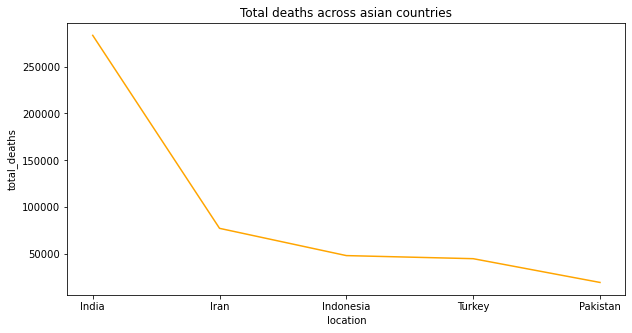

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_asia_deaths[0:5],color='orange')
plt.title("Total deaths across asian countries")

In [23]:
least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
214,VNM,Asia,Vietnam,18-05-2021,4512.0,153.0,134.429,37.0,0.0,0.286,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
41,CHN,Asia,China,18-05-2021,102784.0,15.0,17.714,4846.0,0.0,0.000,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
194,TWN,Asia,Taiwan,18-05-2021,2260.0,243.0,150.000,14.0,2.0,0.286,...,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN
217,YEM,Asia,Yemen,18-05-2021,6586.0,18.0,13.429,1297.0,3.0,3.000,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
109,LAO,Asia,Laos,18-05-2021,1687.0,49.0,46.429,2.0,0.0,0.143,...,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.50,67.92,0.613


<AxesSubplot:xlabel='location', ylabel='total_cases_per_million'>

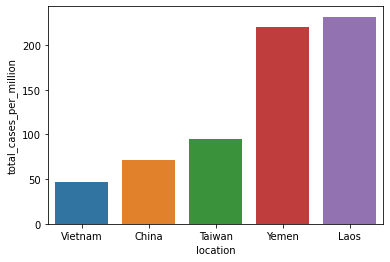

In [24]:
sns.barplot(x="location", y="total_cases_per_million", data=least_asia_cases.head())

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

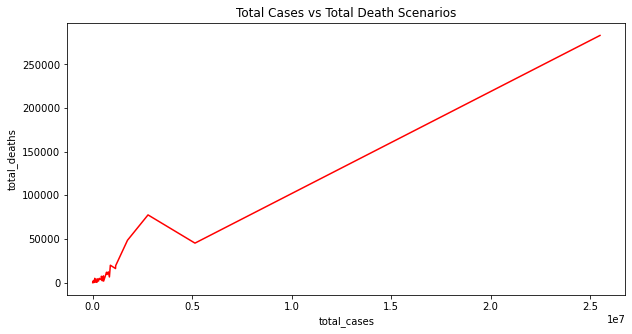

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=asia_data,color="red")
plt.title("Total Cases vs Total Death Scenarios")